# Crime Detection Model

## Import Datasets

In [3]:
import pandas as pd
import numpy as np


In [13]:
crime_dataset1 = pd.read_csv('../datasets/2015-crime-boston.csv')
crime_dataset2 = pd.read_csv('../datasets/2016-crime-boston.csv')
crime_dataset3 = pd.read_csv('../datasets/2017-crime-boston.csv')
crime_dataset4 = pd.read_csv('../datasets/2018-crime-boston.csv')
crime_dataset5 = pd.read_csv('../datasets/2019-crime-boston.csv')
crime_dataset6 = pd.read_csv('../datasets/2020-crime-boston.csv')
crime_dataset7 = pd.read_csv('../datasets/2021-crime-boston.csv')
crime_dataset8 = pd.read_csv('../datasets/2022-crime-boston.csv')
crime_dataset9 = pd.read_csv('../datasets/2023-present-crime-boston.csv')

/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_67626/1611742100.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset5 = pd.read_csv('../datasets/2019-crime-boston.csv')
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_67626/1611742100.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset6 = pd.read_csv('../datasets/2020-crime-boston.csv')
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_67626/1611742100.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset7 = pd.read_csv('../datasets/2021-crime-boston.csv')
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_67626/1611742100.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset8 = pd.read_csv('../datasets/2022-crime-boston.csv')


## Pre-processing 1

In [15]:
for i in range(1,10):
    print(f"Dataset {i} shape: ", eval(f"crime_dataset{i}.shape"))

print(f"Total rows in all datasets: {sum([eval(f'crime_dataset{i}.shape[0]') for i in range(1,10)])}")

Dataset 1 shape:  (53597, 17)
Dataset 2 shape:  (99430, 17)
Dataset 3 shape:  (101338, 17)
Dataset 4 shape:  (98888, 17)
Dataset 5 shape:  (87184, 17)
Dataset 6 shape:  (70894, 17)
Dataset 7 shape:  (71721, 17)
Dataset 8 shape:  (73852, 17)
Dataset 9 shape:  (218897, 17)
Total rows in all datasets: 875801


In [16]:
combined_crime_data = pd.concat([eval(f"crime_dataset{i}") for i in range(1,10)], ignore_index=True)
print("Combined dataset shape: ", combined_crime_data.shape)

Combined dataset shape:  (875801, 17)


In [20]:
combined_crime_data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,BERNARD,NaN,NaN,NaN
2,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
3,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
4,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"
5,I152049897,3201,Property Lost,PROPERTY - LOST,B2,282,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.328663,-71.085634,"(42.32866284, -71.08563401)"
6,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)"
7,I152051083,3130,Search Warrants,SEARCH WARRANT,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
8,I152067251,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,93,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,FANEUIL HALL SQ,42.360205,-71.056208,"(42.36020464, -71.05620816)"
9,I152049588,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155,NaN,2015-06-15 00:01:00,2015,6,Monday,0,Part One,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)"


In [19]:
combined_crime_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [32]:
predict_offense_df = combined_crime_data[['OFFENSE_CODE_GROUP', 'DISTRICT', 'STREET', 'UCR_PART']]
predict_offense_time_df = combined_crime_data[['HOUR', 'DISTRICT', 'STREET']]

In [22]:
predict_offense_df.head()

,OFFENSE_CODE_GROUP,DISTRICT,STREET,UCR_PART
0,Harassment,C11,MELBOURNE ST,Part Two
1,Property Lost,NaN,BERNARD,Part Three
2,Property Lost,B3,NORFOLK ST,Part Three
3,Investigate Person,A7,PARIS ST,Part Three
4,Other,C11,WASHINGTON ST,Part Two


In [33]:
predict_offense_time_df.head()

,HOUR,DISTRICT,STREET
0,0,C11,MELBOURNE ST
1,0,NaN,BERNARD
2,0,B3,NORFOLK ST
3,0,A7,PARIS ST
4,0,C11,WASHINGTON ST


In [35]:
print(predict_offense_df.isnull().sum())
print(predict_offense_time_df.isnull().sum())

OFFENSE_CODE_GROUP    522548
DISTRICT                4748
STREET                 11888
UCR_PART              522645
dtype: int64
HOUR            0
DISTRICT     4748
STREET      11888
dtype: int64


In [40]:
combined_crime_data[combined_crime_data['UCR_PART'] == 'Part One'].head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
9,I152049588,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155,NaN,2015-06-15 00:01:00,2015,6,Monday,0,Part One,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)"
24,I152049486,619,Larceny,LARCENY ALL OTHERS,C6,914,NaN,2015-06-15 02:00:00,2015,6,Monday,2,Part One,GENERAL LAWRENCE J LOGAN,42.327204,-71.053189,"(42.32720403, -71.05318949)"
25,I152049483,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D14,782,NaN,2015-06-15 02:00:00,2015,6,Monday,2,Part One,CAMBRIDGE ST,42.352593,-71.140284,"(42.35259348, -71.14028431)"
27,I152049607,617,Larceny,LARCENY THEFT FROM BUILDING,A1,115,NaN,2015-06-15 02:12:00,2015,6,Monday,2,Part One,LINCOLN ST,42.352018,-71.058116,"(42.35201794, -71.05811581)"
28,I152049485,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,444,NaN,2015-06-15 02:45:00,2015,6,Monday,2,Part One,ESMOND ST,42.298620,-71.085110,"(42.29861988, -71.08511004)"
32,I152049592,724,Auto Theft,AUTO THEFT,C11,345,NaN,2015-06-15 03:00:00,2015,6,Monday,3,Part One,MONTELLO ST,42.302422,-71.061229,"(42.30242197, -71.06122871)"
34,I152049662,619,Larceny,LARCENY ALL OTHERS,C6,191,NaN,2015-06-15 04:48:00,2015,6,Monday,4,Part One,DORCHESTER AVE,42.329038,-71.056945,"(42.32903760, -71.05694505)"
45,I152049502,423,Aggravated Assault,ASSAULT - AGGRAVATED,B3,472,NaN,2015-06-15 07:45:00,2015,6,Monday,7,Part One,WOODHAVEN ST,42.271055,-71.097539,"(42.27105479, -71.09753898)"
47,I152053893,619,Larceny,LARCENY ALL OTHERS,D4,172,NaN,2015-06-15 08:00:00,2015,6,Monday,8,Part One,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
48,I152052877,724,Auto Theft,AUTO THEFT,B3,439,NaN,2015-06-15 08:00:00,2015,6,Monday,8,Part One,STRATTON ST,42.289285,-71.086678,"(42.28928493, -71.08667781)"


In [36]:
combined_crime_data[combined_crime_data['OFFENSE_CODE_GROUP'].isnull()].head(20)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
353253,192017144,3201,NaN,PROPERTY - LOST,D4,167,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,HARRISON AVE,42.334961,-71.075126,"(42.33496089, -71.07512604)"
353254,192001553,3201,NaN,PROPERTY - LOST,D4,128,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,STANHOPE ST,42.348689,-71.072580,"(42.34868906, -71.07257996)"
353255,192000804,2629,NaN,HARASSMENT,B3,417,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,MORA ST,42.282082,-71.073649,"(42.28208187, -71.07364878)"
353256,192065160,619,NaN,LARCENY ALL OTHERS,NaN,,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,BSTN MA,NaN,NaN,NaN
353257,192007583,2647,NaN,THREATS TO DO BODILY HARM,C11,393,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,FLORIDA ST,42.287877,-71.058397,"(42.28787659, -71.05839667)"
353258,192042989,3201,NaN,PROPERTY - LOST,D4,,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,HARRISON AVE,42.334961,-71.075126,"(42.33496089, -71.07512604)"
353259,192020384,3205,NaN,M/V PLATES - LOST,B2,330,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,COLUMBIA RD,42.305247,-71.080894,"(42.30524741, -71.08089422)"
353260,192033744,2629,NaN,HARASSMENT,A1,77,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,NEW SUDBURY ST,42.361838,-71.059765,"(42.36183845, -71.05976493)"
353261,192014219,3201,NaN,PROPERTY - LOST,D4,165,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,HARRISON AVE,42.343025,-71.064940,"(42.34302515, -71.0649397)"
353262,192024554,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B2,266,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,WINTHROP ST,42.325062,-71.078951,"(42.32506211, -71.07895083)"


### (Since we cannot decide what UCR_PART and OFFENSE_CODE_GROUP values to give to the null values, we will have to delete the null rows)

In [42]:
predict_offense_df = predict_offense_df.dropna()
predict_offense_time_df = predict_offense_time_df.dropna()

In [43]:
print(predict_offense_df.shape)
print(predict_offense_time_df.shape)

(341156, 4)
(860240, 3)


In [44]:
predict_offense_df["STREET"].value_counts()

STREET
WASHINGTON ST     15808
BLUE HILL AVE      8638
BOYLSTON ST        8041
DORCHESTER AVE     5684
TREMONT ST         5315
                  ...  
DUDLEY MBTA           1
ALNA PL               1
FORYSTH               1
SIXTH ST              1
ANCHOR ST             1
Name: count, Length: 4393, dtype: int64

In [45]:
predict_offense_df["DISTRICT"].value_counts()

DISTRICT
B2     54288
C11    46706
D4     43823
B3     39213
A1     37627
C6     24635
D14    21769
E13    18831
E18    18712
E5     14443
A7     14050
A15     7059
Name: count, dtype: int64

## Visualization

In [1]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [11]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
data_path = "../datasets"
crime_files = [
    "2015-crime-boston.csv",
    "2016-crime-boston.csv",
    "2017-crime-boston.csv",
    "2018-crime-boston.csv",
    "2019-crime-boston.csv",
    "2020-crime-boston.csv",
    "2021-crime-boston.csv",
    "2022-crime-boston.csv",
    "2023-present-crime-boston.csv",
]

crime_files = [os.path.join(data_path, f) for f in crime_files]

_possible_cols = [
    "INCIDENT_NUMBER","Incident Number","incident_number","CMPNO","ID",
    "OCCURRED_ON_DATE","Occured_On_Date","occurred_on_date","Date","DATE","datetime","FROMDATE","Incident_Datetime",
    "OFFENSE_CODE_GROUP","Offense Code Group","offense_code_group","OFFENSE_DESCRIPTION","Offense Description","offense","TYPE","UCR_PART",
    "HOUR","Hour","hour",
    "DAY_OF_WEEK","Day_of_Week","day_of_week","DOW","Weekday","weekday",
    "Lat","LATITUDE","Latitude","lat",
    "Long","LONGITUDE","Longitude","long","lon","Lng"
]

dfs = []
for f in crime_files:
    if not os.path.exists(f):
        print(f"Skipping (not found): {f}")
        continue
    try:
        df = pd.read_csv(f, low_memory=False, encoding="utf-8", on_bad_lines="skip")
    except Exception as e:
        print(f"Could not read {f}: {e}")
        continue

    keep = [c for c in df.columns if c in _possible_cols]
    if not keep:
        print(f"No expected columns in {f}, skipping")
        continue

    df = df[keep].copy()
    df["__source_file"] = os.path.basename(f)
    dfs.append(df)

if not dfs:
    raise RuntimeError("No usable crime CSVs found.")

raw = pd.concat(dfs, ignore_index=True)


def col_like(cands):
    cl = {c.lower(): c for c in raw.columns}
    for c in cands:
        if c.lower() in cl: return cl[c.lower()]
    for k in cl:
        if any(t in k for t in ["occur","date","time"]): return cl[k]
    return None

def col_type():
    cands = ["OFFENSE_CODE_GROUP","OFFENSE_DESCRIPTION","offense","TYPE","UCR_PART"]
    for c in cands:
        if c in raw.columns: return c
    for c in raw.columns:
        if "offense" in c.lower(): return c
    return None

def col_hour():
    for c in ["HOUR","Hour","hour"]:
        if c in raw.columns: return c
    return None

def col_dow():
    for c in ["DAY_OF_WEEK","Day_of_Week","day_of_week","DOW","Weekday","weekday"]:
        if c in raw.columns: return c
    return None

def col_id():
    for c in ["INCIDENT_NUMBER","Incident Number","incident_number","CMPNO","ID"]:
        if c in raw.columns: return c
    return None

def col_lat():
    for c in ["Lat","LATITUDE","Latitude","lat"]:
        if c in raw.columns: return c
    return None

def col_lon():
    for c in ["Long","LONGITUDE","Longitude","long","lon","Lng"]:
        if c in raw.columns: return c
    return None

dt_col = col_like(["OCCURRED_ON_DATE","occurred_on_date","Date","datetime","FROMDATE","Incident_Datetime"])
type_col = col_type()
hour_col = col_hour()
dow_col = col_dow()
id_col = col_id()
lat_col = col_lat()
lon_col = col_lon()

work = raw.copy()

# datetime
if dt_col is not None:
    work["_dt"] = pd.to_datetime(work[dt_col], errors="coerce", cache=True)
else:
    work["_dt"] = pd.NaT

# Hour
if hour_col is not None:
    work["_hour"] = pd.to_numeric(work[hour_col], errors="coerce")
else:
    work["_hour"] = work["_dt"].dt.hour

# Day-of-week
if dow_col is not None:
    work["_dow"] = work[dow_col].astype(str).str.strip()
else:
    work["_dow"] = work["_dt"].dt.day_name()

# Year/Month
work["_year"]  = work["_dt"].dt.year
work["_month"] = work["_dt"].dt.to_period("M").astype(str)

# Crime type
if type_col is not None:
    work["_type"] = work[type_col].astype(str).str.strip()
else:
    work["_type"] = "Unknown"

# Lat/Lon
work["_lat"] = pd.to_numeric(work[lat_col], errors="coerce") if lat_col else np.nan
work["_lon"] = pd.to_numeric(work[lon_col], errors="coerce") if lon_col else np.nan
work["_row_index"] = work.index

print("\n" + "="*60)
print("Dataset Load & Column Detection Summary")
print("="*60)

print(f"Total Rows Loaded: {len(work):,}")
print("\nDetected Columns:")

print(f"   • Date/Time column : {dt_col}")
print(f"   • Crime Type column: {type_col}")
print(f"   • Hour column      : {hour_col}")
print(f"   • Day-of-week col  : {dow_col}")
print(f"   • Incident ID col  : {id_col}")
print(f"   • Latitude column  : {lat_col}")
print(f"   • Longitude column : {lon_col}")
print("="*60 + "\n")



Dataset Load & Column Detection Summary
Total Rows Loaded: 875,801

Detected Columns:
   • Date/Time column : OCCURRED_ON_DATE
   • Crime Type column: OFFENSE_CODE_GROUP
   • Hour column      : HOUR
   • Day-of-week col  : DAY_OF_WEEK
   • Incident ID col  : INCIDENT_NUMBER
   • Latitude column  : Lat
   • Longitude column : Long



In [12]:
rows_to_drop = []

mask_bad_dt = work["_dt"].isna()
rows_to_drop.extend(work.index[mask_bad_dt].tolist())

mask_bad_hr = work["_hour"].isna() | (work["_hour"] < 0) | (work["_hour"] > 23)
rows_to_drop.extend(work.index[mask_bad_hr].tolist())

mask_bad_type = work["_type"].isna() | (work["_type"].str.strip()=="") | (work["_type"].str.lower()=="nan")
rows_to_drop.extend(work.index[mask_bad_type].tolist())

mask_bad_geo = (
    work["_lat"].isna() | work["_lon"].isna() |
    (work["_lat"] < 42.22) | (work["_lat"] > 42.43) |
    (work["_lon"] < -71.20) | (work["_lon"] > -70.98)
)
rows_to_drop.extend(work.index[mask_bad_geo].tolist())

rows_to_drop = list(set(rows_to_drop))
clean = work.drop(rows_to_drop).copy()

print(f"\nCleaned rows: \n"
      f"Original Rows : {len(work)}\n"
      f"Rows Dropped  : {len(rows_to_drop)}\n"
      f"Clean Rows    : {len(clean)}\n")




Cleaned rows: 
Original Rows : 875801
Rows Dropped  : 545921
Clean Rows    : 329880



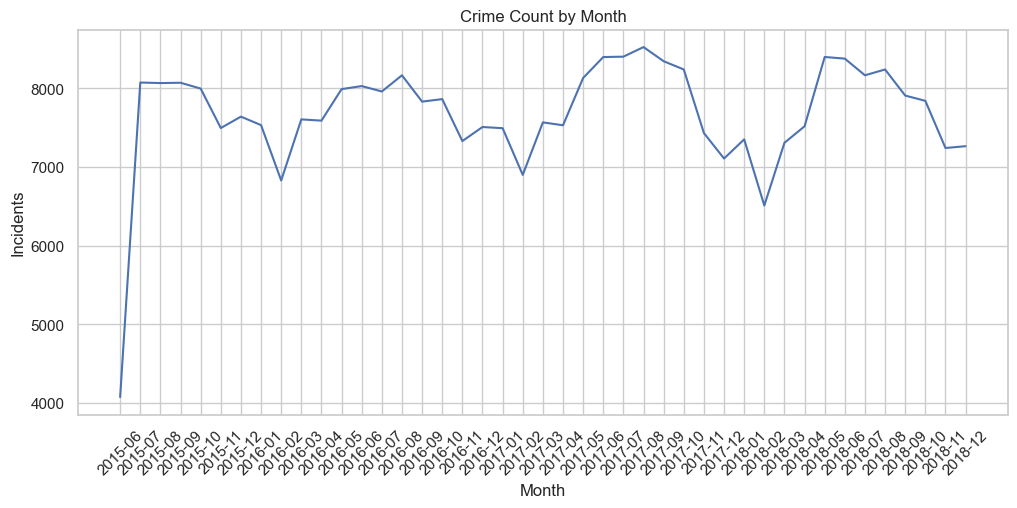

In [ ]:
# 1: Time-series (crime rate over time)
ts = clean.groupby("_month")["_row_index"].count().reset_index(name="count")
plt.figure(figsize=(12,5))
sns.lineplot(x="_month", y="count", data=ts)
plt.xticks(rotation=45)
plt.title("Crime Count by Month")
plt.xlabel("Month")
plt.ylabel("Incidents")
plt.show()

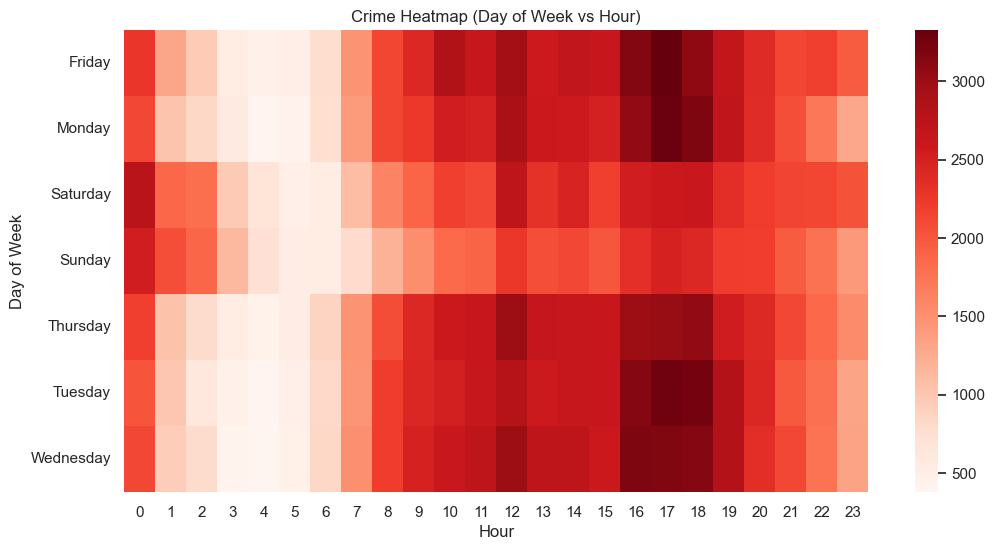

In [ ]:
## Cell 2: Time-of-day heatmap
heat = clean.pivot_table(index="_dow", columns="_hour", values="_row_index", aggfunc="count", fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap="Reds")
plt.title("Crime Heatmap (Day of Week vs Hour)")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.show()


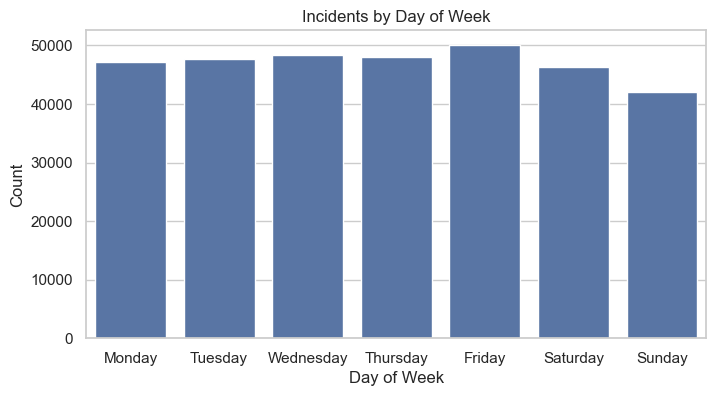

In [ ]:
## Cell 3: Weekly crime bar plot
plt.figure(figsize=(8,4))
sns.countplot(x="_dow", data=clean, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Incidents by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()


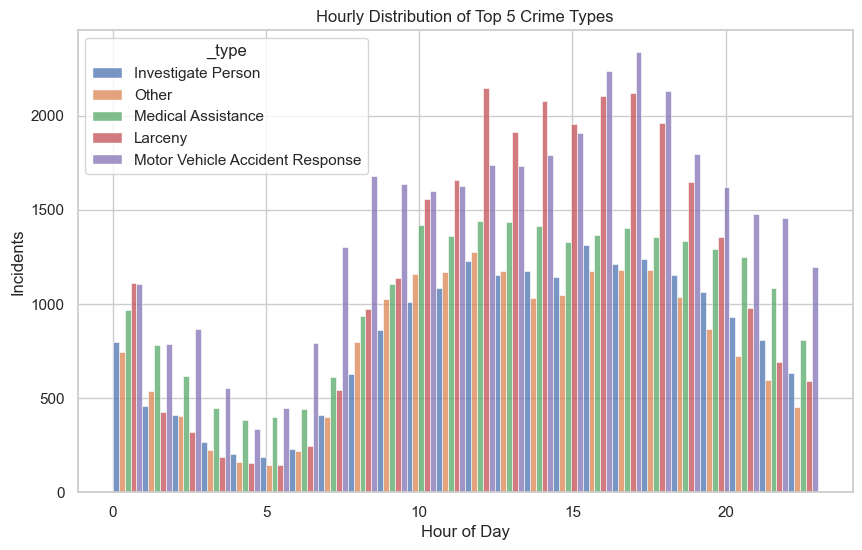

In [ ]:
## Cell 4: Hourly distribution by crime type
top_types = clean["_type"].value_counts().head(5).index
subset = clean[clean["_type"].isin(top_types)]
plt.figure(figsize=(10,6))
sns.histplot(data=subset, x="_hour", hue="_type", multiple="dodge", bins=24)
plt.title("Hourly Distribution of Top 5 Crime Types")
plt.xlabel("Hour of Day")
plt.ylabel("Incidents")
plt.show()


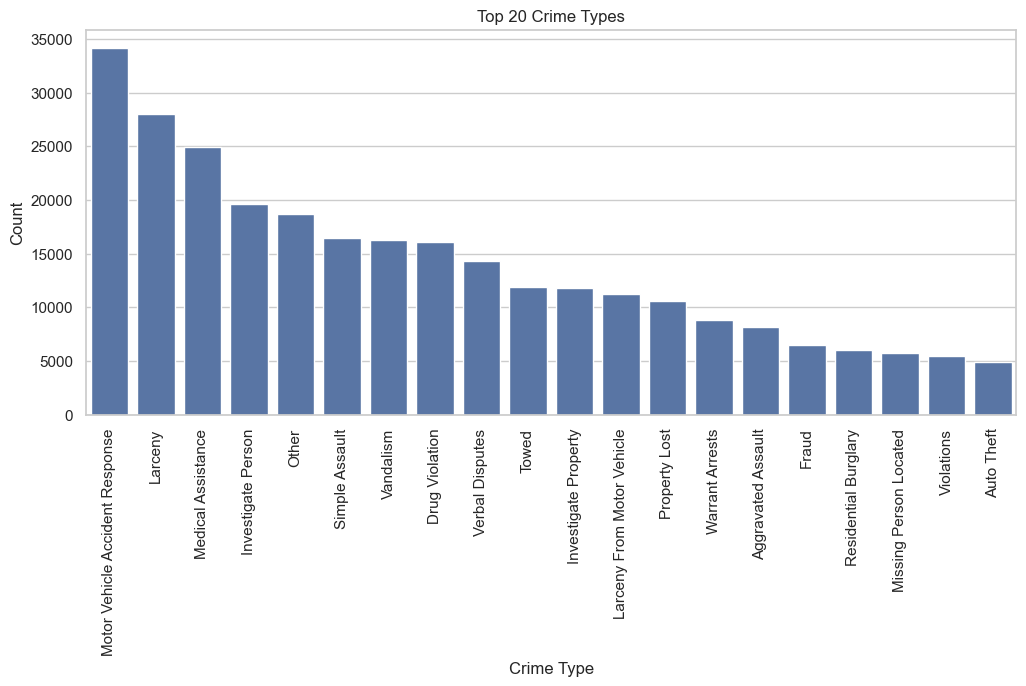

In [ ]:
# Cell 5: CRIME TYPE FREQUENCIES 
freqs = clean["_type"].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=freqs.index, y=freqs.values)
plt.xticks(rotation=90)
plt.title("Top 20 Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()


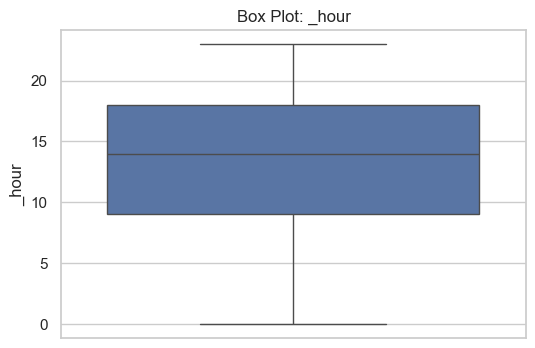

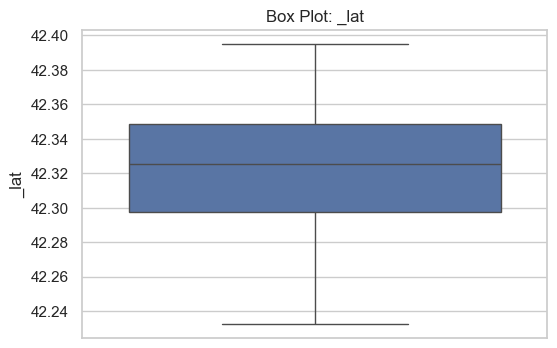

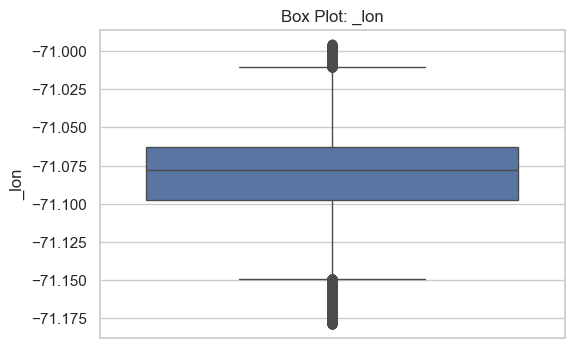

In [ ]:
# Cell 6: Box plots for numeric features
num_cols = ["_hour","_lat","_lon"]
for c in num_cols:
    if c in clean.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(y=clean[c])
        plt.title(f"Box Plot: {c}")
        plt.show()


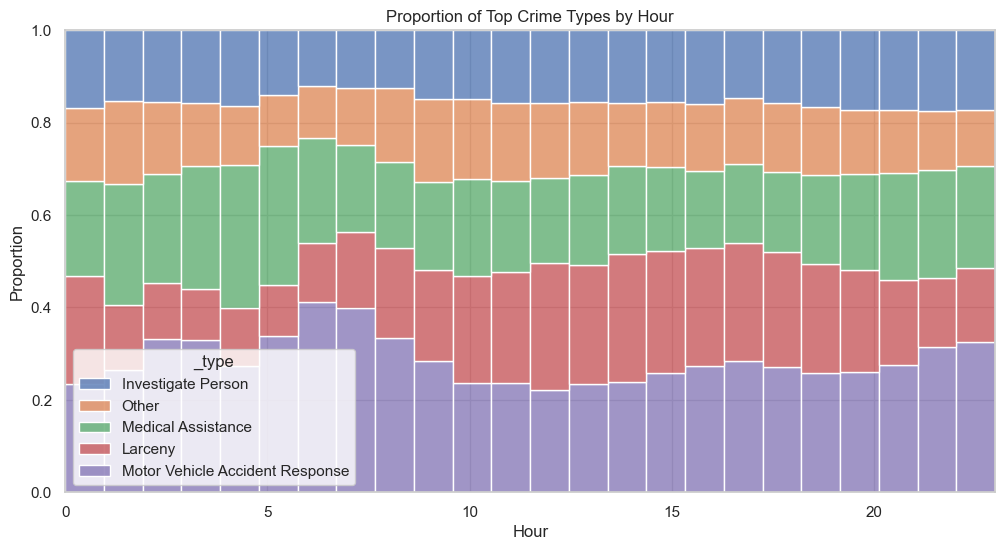

In [ ]:
# Cell 7: Share of crime types across hours
subset = clean[clean["_type"].isin(top_types)]
plt.figure(figsize=(12,6))
sns.histplot(data=subset, x="_hour", hue="_type", multiple="fill", bins=24)
plt.title("Proportion of Top Crime Types by Hour")
plt.xlabel("Hour")
plt.ylabel("Proportion")
plt.show()
